In [2]:
# load exampkle data
import pandas as pd
import seaborn as sns

X = pd.read_csv('Collected_data.csv')

df = X
df.head()

,bottle,vibration_index_red,fill_level_grams_red,vibration_index_blue,fill_level_grams_blue,vibration_index_green,fill_level_grams_green,final_weight,temperature_green,temperature_red,temperature_blue,drop_oscillation,is_cracked
0,49633768,5.741279,560.920608,189.499815,80.666823,-18.069464,793.123069,22.023476,31.882281,30.953910,30.108598,"[""0.0000000000"", ""0.7405013379"", ""0.7459005580...",0
1,49633770,6.640623,559.707026,183.574436,68.864647,-18.279617,793.084280,21.620481,32.461255,30.081944,31.037345,"[""0.0000000000"", ""-0.1114724530"", ""-0.12820843...",0
2,49633772,7.962510,558.500775,190.139174,56.233893,-14.215884,792.999858,22.482647,30.775614,29.647197,31.528189,"[""0.0000000000"", ""0.4344692165"", ""0.6840355953...",0
3,49633774,8.539128,557.217327,179.728038,44.382395,-11.628775,792.825489,21.242908,30.248781,30.160069,29.000430,"[""0.0000000000"", ""0.6933282821"", ""1.1453242376...",0
4,49633776,10.895971,555.721815,185.937718,32.948752,-14.400401,792.805706,22.224880,30.381693,30.559174,30.513200,"[""0.0000000000"", ""0.0349170888"", ""0.0104421672...",0


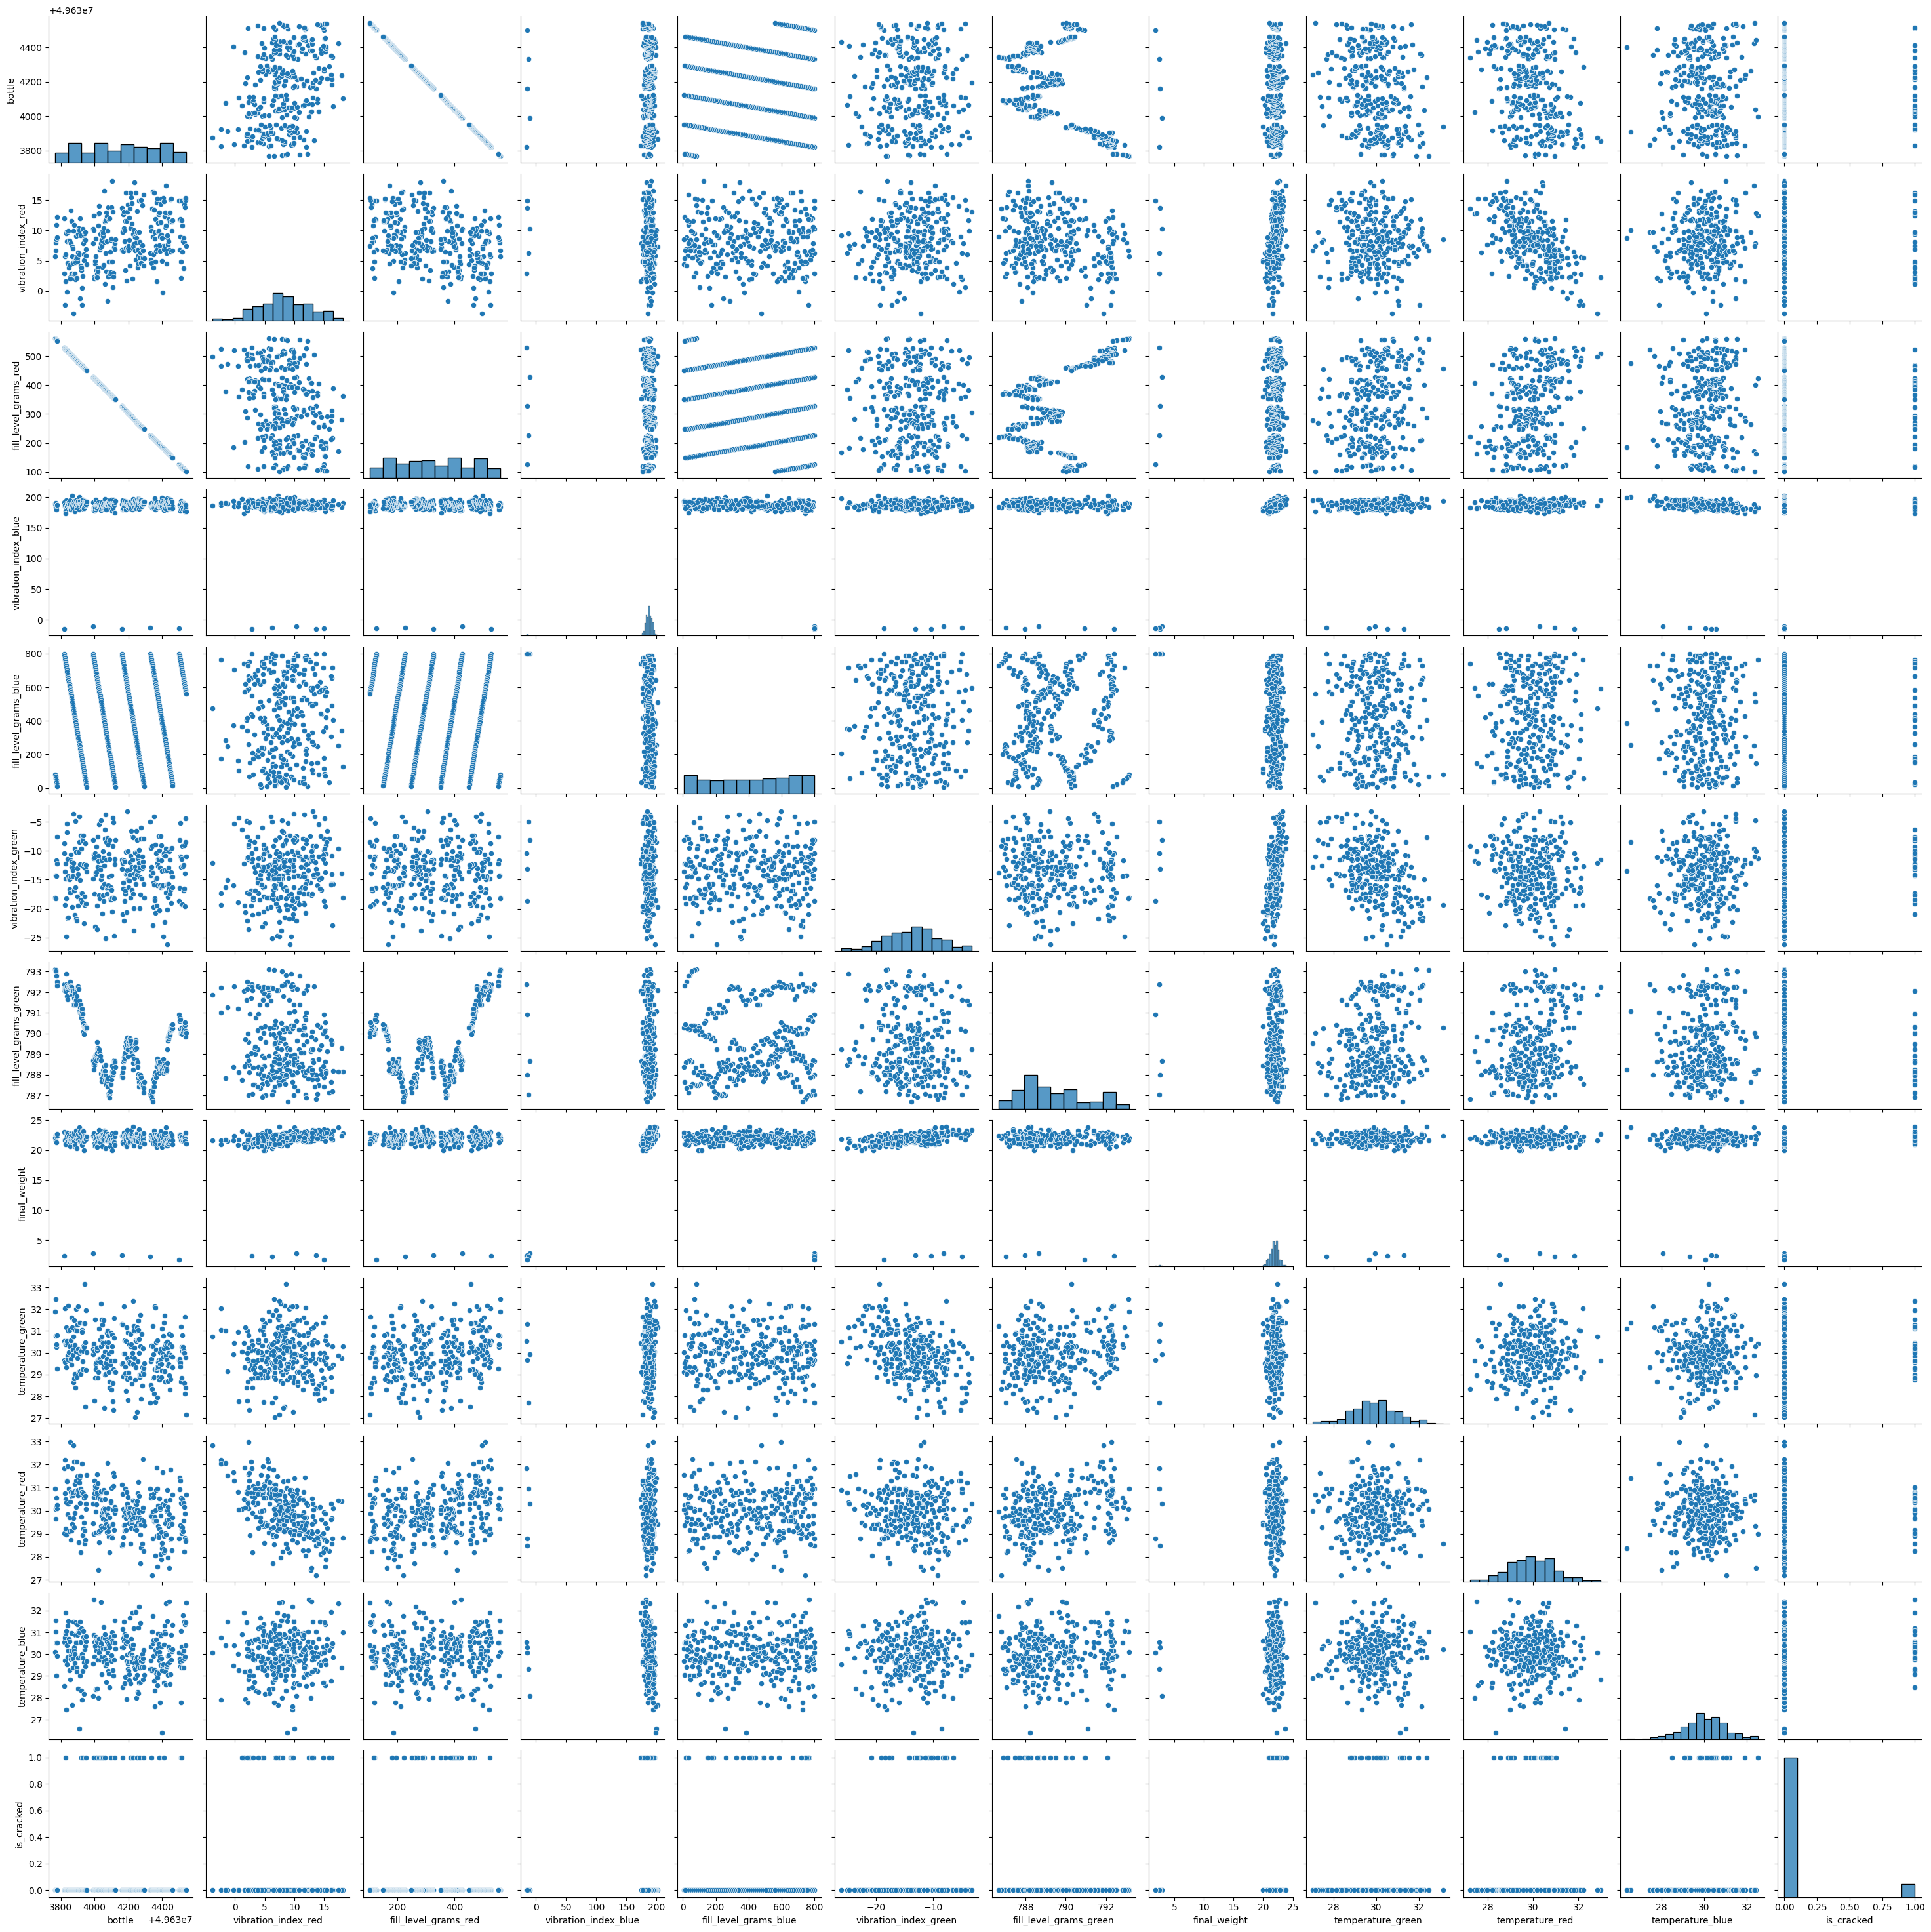

In [3]:
#df['fill_level_category'] = pd.cut(df['fill_level_grams_red'], bins=3, labels=['Low', 'Medium', 'High'])
#df['vibration_category'] = pd.cut(df['vibration_index_red'], bins=3, labels=['Low', 'Medium', 'High'])

sns.pairplot(df)

In [10]:
y = df['final_weight']
X = df.drop(['final_weight', 'bottle', 'is_cracked', 'drop_oscillation'], axis=1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,vibration_index_red,fill_level_grams_red,vibration_index_blue,fill_level_grams_blue,vibration_index_green,fill_level_grams_green,temperature_green,temperature_red,temperature_blue
63,7.852250,462.503172,181.293169,128.174067,-12.697257,790.501149,30.291785,29.229871,30.790597
17,4.671454,516.929630,188.231723,679.831334,-11.389247,791.657790,29.858528,31.918909,31.291689
215,16.431975,218.360579,186.177078,715.299267,-22.860302,787.190525,30.285559,28.789522,30.476846
219,16.214286,213.288965,186.607113,667.259697,-15.825725,787.636189,28.860386,29.618340,28.760756
183,5.161940,274.935195,187.923529,296.022021,-13.376742,789.576098,30.547487,29.321144,29.781755


In [11]:
import numpy as np
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

model.coef_

array([0.1   , 0.0005, 0.1   , 0.0005, 0.1   , 0.0005, 0.2   , 0.2   ,
       0.2   ])

In [12]:
y_pred = model.predict(X_train)
y_test_hat = model.predict(X_test)
y_pred

array([21.39785609, 22.7594274 , 21.74568577, 21.98155632, 21.58121667,
       21.87366057, 22.14971197, 21.81706181, 19.93380422, 22.36030357,
       22.61317878, 22.34692512, 22.11902701, 21.75950642, 20.68794771,
       22.70546591, 21.80809376, 22.37668703, 21.60864869, 20.67370767,
       21.86282194, 20.64592857, 21.50465203, 22.93790708, 22.84533447,
       22.24335904, 22.19588175, 22.33578866, 22.28899982, 22.22039396,
       21.80105396, 21.34878575, 21.19481411, 22.62356337, 21.44693716,
       21.58453329, 21.73521419, 21.32112909, 21.09191016, 21.34560005,
       21.77168403, 21.29693159, 21.67007467, 22.44568114, 21.25871435,
       21.56983414, 21.14023421, 21.58835724, 23.33006438, 20.51453597,
       20.66988918, 22.72925295, 21.64304991, 21.10305511, 22.16503325,
       22.51622718, 23.05623536, 22.45009637, 22.53630411, 22.25598756,
       22.44736093, 22.49182396, 21.72192319, 21.64642332, 21.09894635,
       21.90161557,  2.36114442, 21.78112161, 22.23705597, 21.99

In [13]:
results_df = pd.DataFrame({
    'Actual': y_train.values,
    'Predicted': y_pred
}, index=y_train.index)

df_test = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_test_hat
}, index=y_test.index)

# Füge gewünschte Feature-Spalten hinzu
for col in ['vibration_index_red', 'vibration_index_blue', 'fill_level_grams_blue']:
    if col in X_train.columns:
        results_df[col] = X_train[col].values

results_df
df_test

,Actual,Predicted
274,21.008511,21.008511
155,22.764194,22.764194
84,21.368616,21.368616
82,22.031386,22.031386
261,21.951426,21.951426
9,21.732296,21.732296
42,23.240807,23.240807
277,22.305529,22.305529
282,22.224715,22.224715
92,22.178741,22.178741


In [15]:
from sklearn.metrics import mean_squared_error

#mean_squared_error(y_train, y_pred)
mean_squared_error(y_test, y_test_hat)

7.173375164809734e-29

In [ ]:
results_df["Error"] = results_df["Actual"] - results_df["Predicted"]
results_df["Squared Error"] = results_df["Error"] ** 2
results_df

,Actual,Predicted,vibration_index_red,vibration_index_blue,fill_level_grams_blue,Error,Squared Error
63,21.397856,21.397856,7.852250,181.293169,128.174067,-3.552714e-15,1.262177e-29
17,22.759427,22.759427,4.671454,188.231723,679.831334,1.421085e-14,2.019484e-28
215,21.745686,21.745686,16.431975,186.177078,715.299267,7.105427e-15,5.048710e-29
219,21.981556,21.981556,16.214286,186.607113,667.259697,7.105427e-15,5.048710e-29
183,21.581217,21.581217,5.161940,187.923529,296.022021,3.552714e-15,1.262177e-29
...,...,...,...,...,...,...,...
188,22.015509,22.015509,6.774967,193.093838,237.111699,0.000000e+00,0.000000e+00
71,22.161958,22.161958,5.822581,191.224681,32.653711,0.000000e+00,0.000000e+00
106,22.237442,22.237442,4.264053,190.209419,416.093244,3.552714e-15,1.262177e-29
270,21.700081,21.700081,11.512330,188.469264,61.996312,7.105427e-15,5.048710e-29


In [ ]:
results_df["Squared Error"].mean()

df

,bottle,vibration_index_red,fill_level_grams_red,vibration_index_blue,fill_level_grams_blue,vibration_index_green,fill_level_grams_green,final_weight,temperature_green,temperature_red,temperature_blue
0,49633768,5.741279,560.920608,189.499815,80.666823,-18.069464,793.123069,22.023476,31.882281,30.953910,30.108598
1,49633770,6.640623,559.707026,183.574436,68.864647,-18.279617,793.084280,21.620481,32.461255,30.081944,31.037345
2,49633772,7.962510,558.500775,190.139174,56.233893,-14.215884,792.999858,22.482647,30.775614,29.647197,31.528189
3,49633774,8.539128,557.217327,179.728038,44.382395,-11.628775,792.825489,21.242908,30.248781,30.160069,29.000430
4,49633776,10.895971,555.721815,185.937718,32.948752,-14.400401,792.805706,22.224880,30.381693,30.559174,30.513200
...,...,...,...,...,...,...,...,...,...,...,...
291,49634532,13.846251,107.609359,188.093533,608.232732,-13.906559,790.397469,21.923267,28.116697,28.817868,29.899557
292,49634534,15.149270,106.143995,176.698610,596.728315,-19.577834,790.529628,21.545880,31.637502,29.872293,31.351076
293,49634536,15.075130,104.766123,183.205890,584.247791,-4.356089,790.128081,22.845334,28.375750,28.731878,31.458725
294,49634538,15.387426,103.430783,186.980668,571.622787,-8.482562,789.844686,22.889139,29.763476,28.666685,30.410520


In [ ]:
y_pred = model.predict(X_test)

mean_squared_error(y_test, y_pred)

7.173375164809734e-29

<Axes: xlabel='Error', ylabel='Count'>

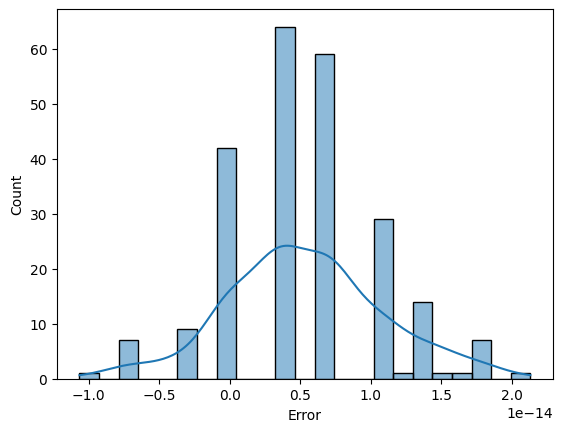

In [ ]:
# Hier wird z.B. sichbar, dass der Fehler nahezu normalverteilt ist
# Das bedeutet, dass der Fehler zufällig ist und keine systematischen Fehler vorliegen
sns.histplot(results_df["Error"], kde=True)

In [17]:
# Formel als String ausgeben
formel = "y = "
for name, coef in zip(X_train.columns, model.coef_):
    formel += f"({coef:.4f})*{name} + "
formel += f"({model.intercept_:.4f})"
print("Lineares Regressionsmodell:")
print(formel)

Lineares Regressionsmodell:
y = (0.1000)*vibration_index_red + (0.0005)*fill_level_grams_red + (0.1000)*vibration_index_blue + (0.0005)*fill_level_grams_blue + (0.1000)*vibration_index_green + (0.0005)*fill_level_grams_green + (0.2000)*temperature_green + (0.2000)*temperature_red + (0.2000)*temperature_blue + (-15.0000)


In [ ]:
# Prognose für X Datenset und als CSV speichern mit dynamischem Namen

# Platzhalter für Materialnamen
Mat1 = "52315887"
Mat2 = "Philipp_W"
Mat3 = "Andreas_L"

# Neues Datenset laden
X_given = pd.read_csv('X.csv')
results_given = X_given.copy()
# Die Drop-Listen korrekt als Listen angeben
drop_cols = [
    'vibration_index_red',
    'fill_level_grams_red',
    'vibration_index_blue',
    'fill_level_grams_blue',
    'vibration_index_green',
    'fill_level_grams_green',
    'temperature_green',
    'temperature_red',
    'temperature_blue'
]

results_given = X_given.drop(drop_cols, axis=1)
X_given = X_given.drop(['bottle'], axis=1)

# Gewicht schätzen
y_pred_given = model.predict(X_given)

# Ergebnisse in DataFrame speichern

results_given['Predicted_Weight'] = y_pred_given

# Dynamischen Dateinamen erstellen
filename = f"reg_{Mat1}_{Mat2}_{Mat3}.csv"

# Als CSV speichern
results_given.to_csv(filename, index=False)

print(f"Ergebnisse gespeichert als: {filename}")

Ergebnisse gespeichert als: reg_MaterialA_MaterialB_MaterialC.csv
